In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sample_log_file = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/yule-10-0-bccd.log")
reference_log_file = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/beast/yule-10-0.log")

In [3]:
sample_logs = pd.read_csv(sample_log_file)
reference_logs = pd.read_csv(reference_log_file, delimiter="\t")

In [4]:
sample_log_posteriors = dict(zip(
    sample_logs.state,
    np.log(sample_logs.posterior / np.sum(sample_logs.posterior))
))

/Users/tobiaochsner/Documents/Thesis/Validation/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
reference_log_posteriors = dict(zip(
    reference_logs.Sample.map(lambda x: f"STATE_{x}"),
    reference_logs.posterior
))

<Axes: ylabel='Density'>

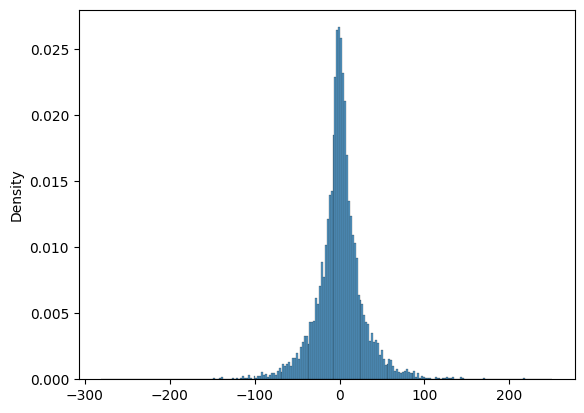

In [7]:
from random import sample

states = list(reference_log_posteriors.keys())

NUM_PAIRS = 10_000

log_abs_errors = []

for _ in range(NUM_PAIRS):
    state_a, state_b = sample(states, 2)
    ref_log_posterior_diff = (reference_log_posteriors[state_a] - reference_log_posteriors[state_b])
    sample_log_posterior_diff = (sample_log_posteriors[state_a] - sample_log_posteriors[state_b])

    error = ref_log_posterior_diff - sample_log_posterior_diff
    log_abs_errors.append(error)

sns.histplot(log_abs_errors, stat="density")